<a href="https://colab.research.google.com/github/Kamna-S/OIBSIP/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Spam Detection**

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('/content/spam.csv')

In [4]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
mail_data = data.where((pd.notnull(data)),'')

In [6]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
mail_data.shape

(5572, 2)

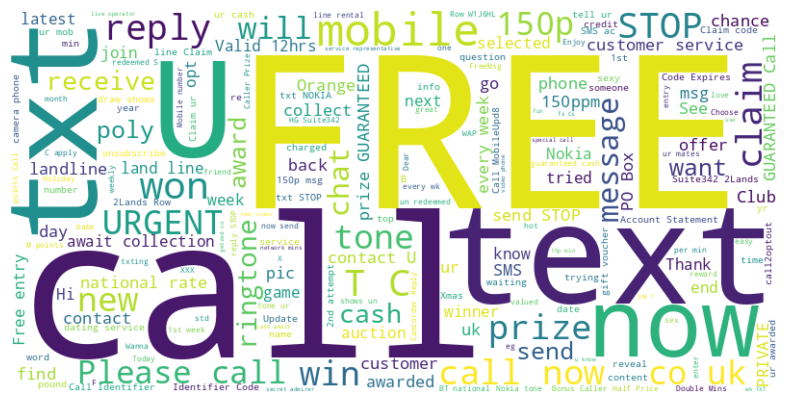

In [38]:
mail_data = data[data['Category'] == 'spam']
spam_text = ' '.join(mail_data['Message'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


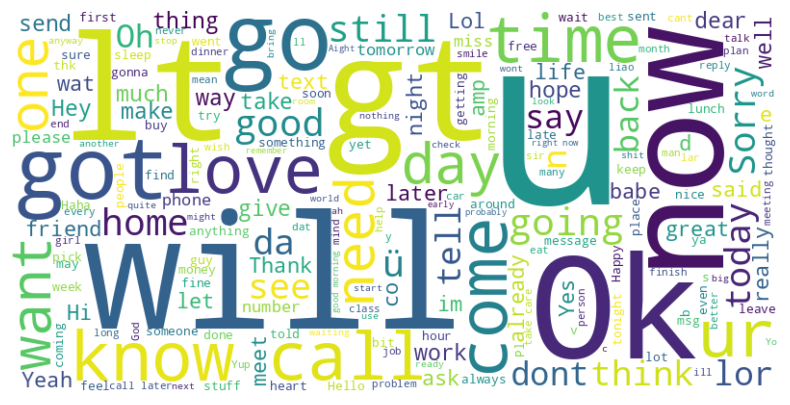

In [39]:
mail_data = data[data['Category'] == 'ham']
spam_text = ' '.join(mail_data['Message'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [9]:
x = mail_data['Message']
y = mail_data['Category']

In [10]:
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [13]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

In [19]:
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [20]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [21]:
print(X_train_features)

  (0, 2390)	1
  (0, 3934)	1
  (0, 2284)	1
  (0, 4594)	1
  (0, 3403)	1
  (0, 5591)	1
  (1, 3934)	1
  (1, 2356)	1
  (1, 7654)	2
  (1, 7454)	1
  (1, 3146)	1
  (1, 2047)	1
  (1, 3053)	1
  (1, 1316)	1
  (1, 7660)	2
  (1, 2845)	1
  (1, 6239)	1
  (1, 6769)	1
  (1, 4909)	1
  (1, 7447)	1
  (1, 3715)	1
  (1, 4283)	1
  (1, 2921)	1
  (1, 1894)	1
  (1, 937)	1
  :	:
  (4455, 3995)	1
  (4455, 913)	1
  (4455, 7349)	1
  (4455, 6289)	1
  (4455, 7034)	1
  (4455, 6437)	1
  (4455, 5824)	1
  (4455, 2536)	1
  (4455, 2307)	1
  (4456, 2963)	2
  (4456, 6892)	2
  (4456, 5961)	1
  (4456, 3096)	1
  (4456, 334)	1
  (4456, 6506)	1
  (4456, 6448)	1
  (4456, 7387)	2
  (4456, 7391)	1
  (4456, 6219)	1
  (4456, 5747)	2
  (4456, 6938)	1
  (4456, 6510)	1
  (4456, 647)	1
  (4456, 5116)	1
  (4456, 141)	1


In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [26]:
prediction = model.predict(X_train_features)
accuracy = accuracy_score(Y_train, prediction)

In [28]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.997083239847431


In [29]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [30]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.979372197309417


In [40]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = vectorizer.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('Non Spam mail')
else:
  print('Spam mail')

[1]
Non Spam mail


In [41]:
input_mail = ["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
input_data_features = vectorizer.transform(input_mail)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction[0]==1):
  print('Non Spam mail')
else:
  print('Spam mail')

[0]
Spam mail
